# Find 15 hidden objects in the picture

## Import

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [25]:
%matplotlib inline

## Load the image and objects

In [26]:
image_path = 'image_2.jpg'
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [27]:
objects_folder = '2_objects'
object_files = [f for f in os.listdir(objects_folder) if os.path.isfile(os.path.join(objects_folder, f))]

### Plot the images

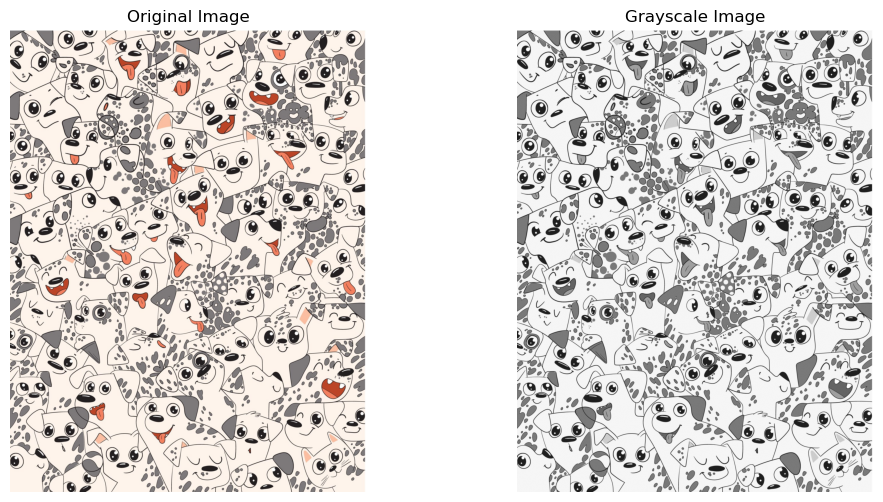

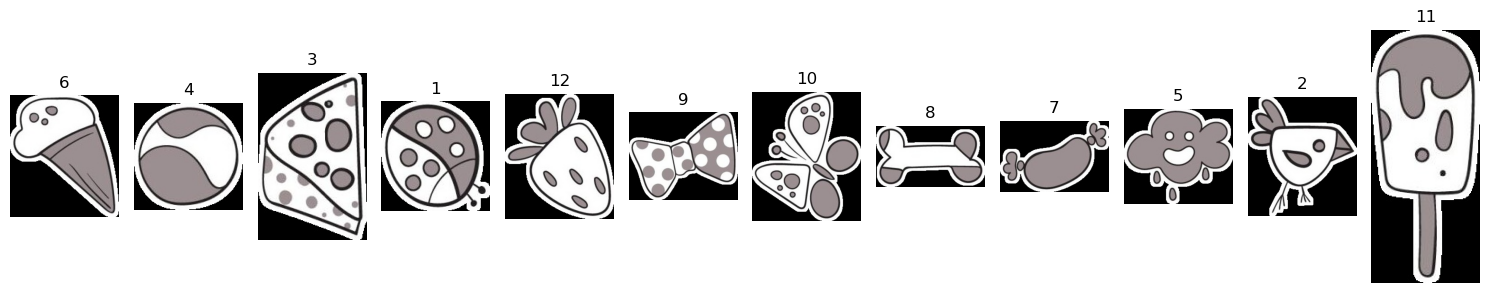

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

fig, axes = plt.subplots(1, len(object_files), figsize=(15, 5))

for ax, object_file in zip(axes, object_files):
    object_path = os.path.join(objects_folder, object_file)
    object_img = cv2.imread(object_path)
    if object_img is None:
        continue
    object_img_rgb = cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB)
    ax.imshow(object_img_rgb)
    ax.set_title(object_file.split('.')[0])
    ax.axis('off')

plt.tight_layout()
plt.show()

## Loop through each objects and detect it in the image

In [29]:
found_objects = []
object_count = 0

image_edges = cv2.Canny(image_gray, 50, 200)

# list of scale's candidate
scales = np.linspace(0.4, 0.9, 51)

for i in range(1, 13):
    object_image = cv2.imread(f'2_objects/{i}.jpg', 0)

    if object is None:
        print(f"Object {i} not found!")
        continue

    # initialize best match values
    best_match_val = -1
    best_match_loc = None
    best_template = None
    best_scale = 1.0

    # try on candidate
    for scale in scales:
        # resize the object with current scale
        resized_object = cv2.resize(
            object_image,
            (0,0),
            fx=scale,
            fy=scale,
            interpolation=cv2.INTER_AREA
        )

        # validate the size of object
        if resized_object.shape[0] > image_gray.shape[0] or resized_object.shape[1] > image_gray.shape[1]:
            continue

        # edge detection on resized object
        object_edges = cv2.Canny(resized_object, 50, 200)

        # template matching
        result = cv2.matchTemplate(
            image_edges,
            object_edges,
            cv2.TM_CCOEFF
        )

        _, max_val, _, max_loc = cv2.minMaxLoc(result)

        # update best match
        if max_val > best_match_val:
            best_match_val = max_val
            best_match_loc = max_loc
            best_template = resized_object
            best_scale = scale

    # draw rectangle
    if best_match_loc is not None:
        top_left = best_match_loc
        h, w = best_template.shape
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(
            image,
            top_left,
            bottom_right,
            (0, 255, 0),
            2
        )
        print(f"Found {i}th object with scale {best_scale:.2f}" )



Found 1th object with scale 0.79
Found 2th object with scale 0.72
Found 3th object with scale 0.79
Found 4th object with scale 0.79
Found 5th object with scale 0.78
Found 6th object with scale 0.79
Found 7th object with scale 0.73
Found 8th object with scale 0.67
Found 9th object with scale 0.78
Found 10th object with scale 0.78
Found 11th object with scale 0.78
Found 12th object with scale 0.78


## Display results

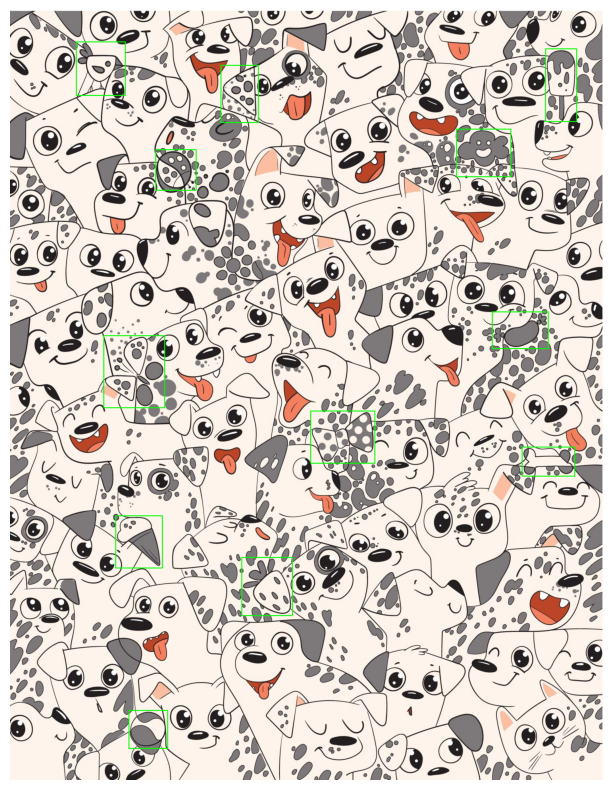

In [30]:
plt.figure(figsize=(16,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()